In [12]:
import pandas as pd
DIR = "/home/jupyter-user-3/shared_data_read_only/Education-Data/"

school_metric_scores = pd.read_csv(DIR+'SPREE_SY2122_School_Metric_Scores.csv')

# Group by 'school_name' where 'metric' is '% of Students Attending Less Than 80% of Instructional Days'
filtered_df = school_metric_scores[school_metric_scores['metric'] == '% of Students Attending Less Than 80% of Instructional Days']

In [13]:
import pandas as pd

DIR = "/home/jupyter-user-3/shared_data_read_only/Education-Data/"
master_school_list = pd.read_csv(DIR + '2023-2024 Master School List (20231003).csv')
master_school_list.loc[:, 'School Name (ULCS)'] = master_school_list['School Name (ULCS)'].str.lower()
filtered_df.loc[:, 'school_name'] = filtered_df['school_name'].str.lower()
merged_df = pd.merge(filtered_df, master_school_list, left_on='school_name', right_on='School Name (ULCS)', how='inner')

In [14]:
import pandas as pd

merged_df['metric_score'] = pd.to_numeric(merged_df['metric_score'], errors='coerce')  # Convert to numeric, coerce errors to NaN
mean_metric_scores = merged_df.groupby('Zip Code')['metric_score'].mean().reset_index()
zip_codes_of_interest = [19141, 19142, 19143, 19144, 19145, 19146, 19147, 19148, 19149, 19150, 19151, 19152, 19444]

filtered_mean_metric_scores = mean_metric_scores[mean_metric_scores['Zip Code'].isin(zip_codes_of_interest)]
print(filtered_mean_metric_scores)



    Zip Code  metric_score
27     19141     10.766667
28     19142     25.350000
29     19143     28.920000
30     19144     13.766667
31     19145     18.850000
32     19146      9.000000
33     19147      3.400000
34     19148     21.625000
35     19149     14.840000
36     19150     12.000000
37     19151     10.500000
38     19152      9.725000


In [15]:
import pandas as pd

DIR = "/home/jupyter-user-3/shared_data_read_only/Education-Data/"
table1 = pd.read_csv(DIR + '2023-2024 Enrollment & Demographics.csv')
table2 = pd.read_csv(DIR + '2023-2024 Master School List (20231003).csv')
table3 = pd.read_csv(DIR + 'SDP_College_Matriculation_2021-2022.csv')
student_ada_yearly = pd.read_csv(DIR + 'Student_ADA_Yearly.csv')

table2.rename(columns={'ULCS Code': 'ulcscode'}, inplace=True)
table3.rename(columns={'ULCS Code': 'ulcscode'}, inplace=True)
student_ada_yearly.rename(columns={'ULCS Code': 'ulcscode'}, inplace=True)


merged_table = pd.merge(table1, table2, on='ulcscode')
merged_table = pd.merge(merged_table, table3, on='ulcscode')
merged_table = pd.merge(merged_table, student_ada_yearly, on='ulcscode')

zip_codes_of_interest = [19141, 19142, 19143, 19144, 19145, 19146, 19147, 19148, 19149, 19150, 19151, 19152, 19444]
filtered_table = merged_table[merged_table['Zip Code'].isin(zip_codes_of_interest)]
grouped_table = filtered_table.groupby('Zip Code').agg({'ELPCT': 'mean', 'BlackAfricanAmericanPCT': 'mean', 'Average Daily Attendance (YTD)': 'mean'})

grouped_table

,ELPCT,BlackAfricanAmericanPCT,Average Daily Attendance (YTD)
Zip Code,,,
19141,4.362000,44.001000,94.831667
19142,21.856000,77.390000,77.126667
19143,11.624000,92.030000,93.493333
19145,2.145556,25.501111,96.573333
19147,5.391000,35.943000,95.781667
19148,47.066000,27.773000,79.681667
19150,2.088750,84.015000,93.870000


In [24]:
merged_data = pd.merge(grouped_table, filtered_mean_metric_scores[['Zip Code', 'metric_score']], on='Zip Code', how='left')
print(merged_data)

   Zip Code      ELPCT  BlackAfricanAmericanPCT  \
0     19141   4.362000                44.001000   
1     19142  21.856000                77.390000   
2     19143  11.624000                92.030000   
3     19145   2.145556                25.501111   
4     19147   5.391000                35.943000   
5     19148  47.066000                27.773000   
6     19150   2.088750                84.015000   

   Average Daily Attendance (YTD)  metric_score  
0                       94.831667     10.766667  
1                       77.126667     25.350000  
2                       93.493333     28.920000  
3                       96.573333     18.850000  
4                       95.781667      3.400000  
5                       79.681667     21.625000  
6                       93.870000     12.000000  


In [25]:
import csv

with open('Data', 'r') as file:    
    lines = file.readlines()

with open('output.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for line in lines:
        csvwriter.writerow([line.strip()])


In [49]:
import pandas as pd
DIR2 = "/home/jupyter-user-3/"
Data = pd.read_csv(DIR2+'Data.csv')
Data = Data.drop('Unnamed: 0', axis=1)
grouped_data = Data.groupby('Zip Code').mean()
print(grouped_data)


          With children under 18 years  Below poverty level  \
Zip Code                                                      
19141                       520.857143            15.571429   
19144                       421.947368            15.005263   
19147                       225.000000             7.300000   
19149                       711.000000             6.300000   
19151                       466.333333            18.033333   

          Black or African American alone  
Zip Code                                   
19141                           85.528571  
19144                           65.684211  
19147                            0.600000  
19149                           46.200000  
19151                           79.900000  


In [62]:
combined_data = pd.merge(merged_data, grouped_data, on='Zip Code', how='outer')
combined_data

,Zip Code,ELPCT,BlackAfricanAmericanPCT,Average Daily Attendance (YTD),metric_score,With children under 18 years,Below poverty level,Black or African American alone
0,19141,4.362000,44.001000,94.831667,10.766667,520.857143,15.571429,85.528571
1,19142,21.856000,77.390000,77.126667,25.350000,NaN,NaN,NaN
2,19143,11.624000,92.030000,93.493333,28.920000,NaN,NaN,NaN
3,19144,NaN,NaN,NaN,NaN,421.947368,15.005263,65.684211
4,19145,2.145556,25.501111,96.573333,18.850000,NaN,NaN,NaN
5,19147,5.391000,35.943000,95.781667,3.400000,225.000000,7.300000,0.600000
6,19148,47.066000,27.773000,79.681667,21.625000,NaN,NaN,NaN
7,19149,NaN,NaN,NaN,NaN,711.000000,6.300000,46.200000
8,19150,2.088750,84.015000,93.870000,12.000000,NaN,NaN,NaN
9,19151,NaN,NaN,NaN,NaN,466.333333,18.033333,79.900000


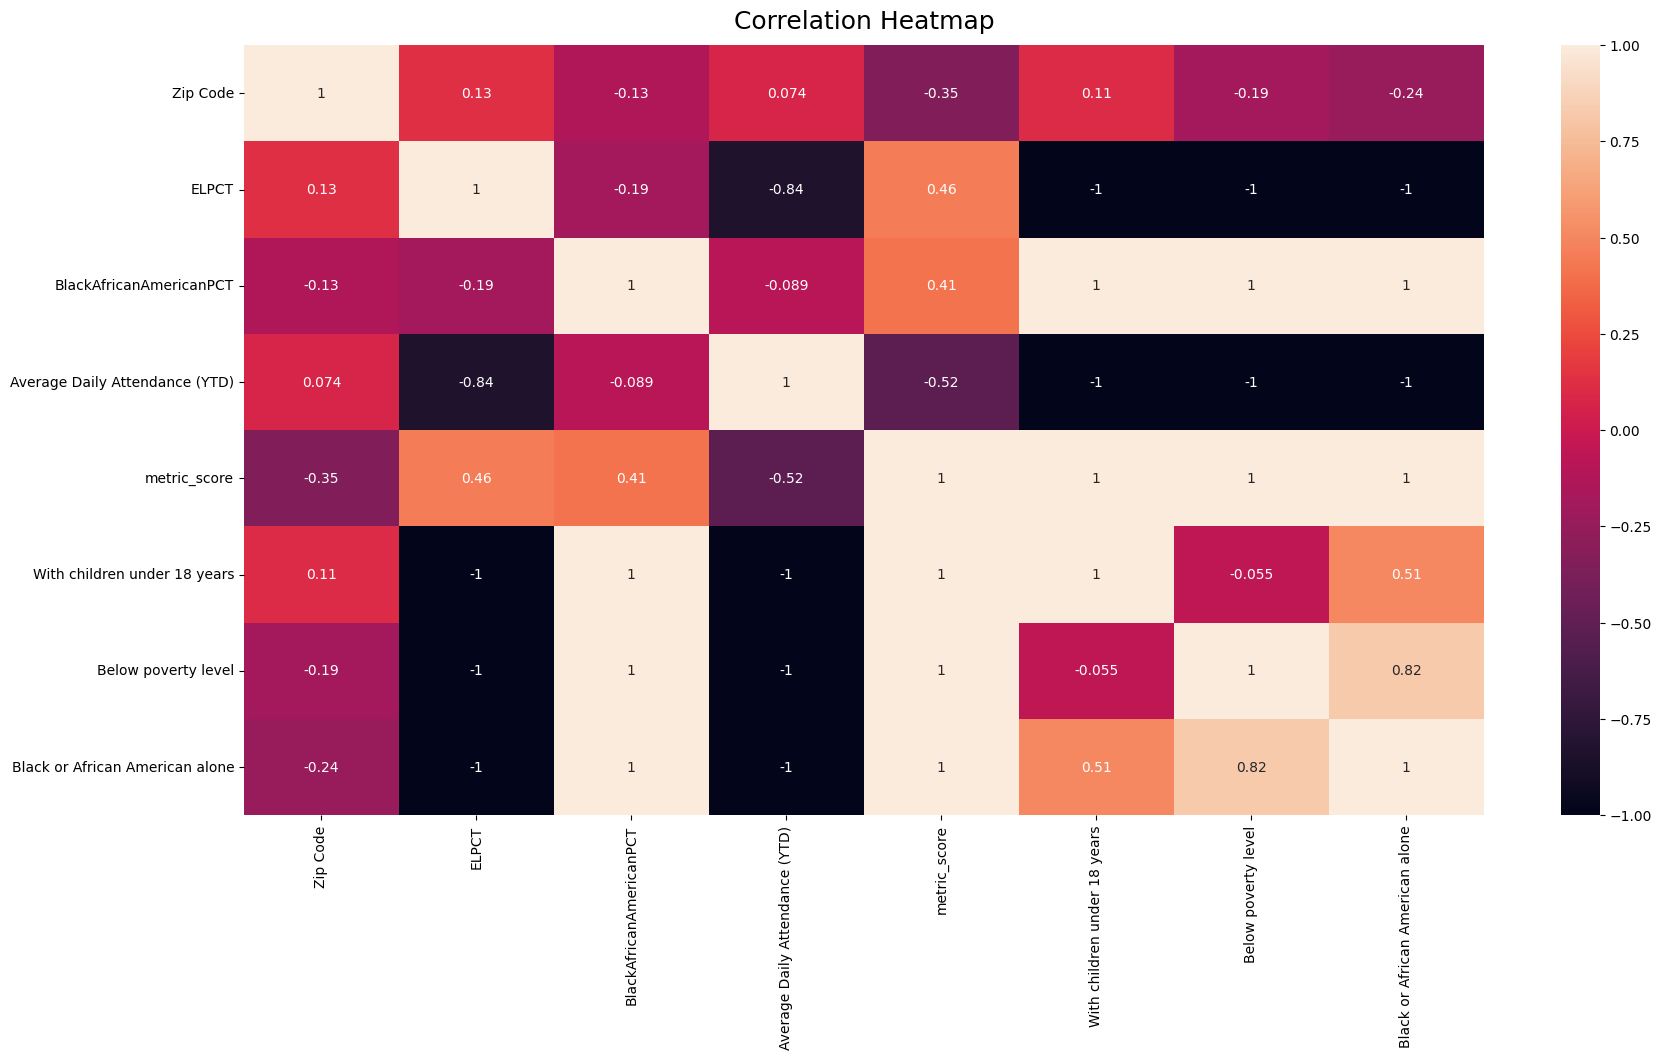

In [65]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(combined_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);